In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



The maximum wind speed occurring every 50 years has to be greater than 34.63345579700954


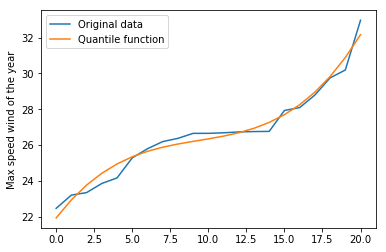

In [2]:
# import data
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

#find cumulative probability and 2% quatile
c_prob = np.array([i/(years_nb+1) for i in range(years_nb)])
max_speeds.sort()
quantile_func = interpolate.UnivariateSpline(c_prob, max_speeds)
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)

# Conclusions
print('The maximum wind speed occurring every 50 years has to be greater than',fifty_wind)
plt.plot(max_speeds, label='Original data')
plt.plot(quantile_func(c_prob), label='Quantile function')
plt.legend(loc = 'upper left')
plt.ylabel('Max speed wind of the year')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [3]:
def sin_f(x, A, nu, fi, k):
    return A * np.sin(nu * (x+fi)) + k

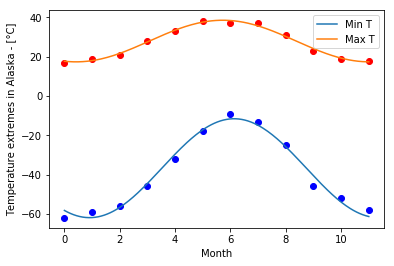

fitted curves seem to follow the given points very well
Time offset between max and min T:  0.45 months


In [4]:
from scipy import optimize

# Importing data
max_T = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_T = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Fit
months = np.arange(12)
max_T_par, _ = optimize.curve_fit(sin_f, months, max_T, p0=[10,0,1,30])
min_T_par, _ = optimize.curve_fit(sin_f, months, min_T, p0=[20,0,1,-40])

# Plot
domain = np.linspace(0,11,200)
plt.plot(max_T, 'ro')
plt.plot(min_T, 'bo')
plt.plot(domain, sin_f(domain, min_T_par[0], min_T_par[1], min_T_par[2],  min_T_par[3]), label = 'Min T')
plt.plot(domain, sin_f(domain, max_T_par[0], max_T_par[1], max_T_par[2],  max_T_par[3]), label = 'Max T')
plt.ylabel('Temperature extremes in Alaska - [°C]')
plt.xlabel('Month')
plt.legend()
plt.show()
plt.close()

# Conclusions
print('fitted curves seem to follow the given points very well')
print('Time offset between max and min T: ',
      round(max_T_par[2] - min_T_par[2],2),'months')

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [5]:
def f(X):
    return (4-2.1*X[0]**2+X[0]**4/3)*X[0]**2 + X[0]*X[1] + (4*X[1]**2-4)*X[1]**2

Starter point for minimization:  [-0.61312224 -0.9289696 ]
The found minimum is -1.031628444481764 in [ 0.08982135 -0.71262517]


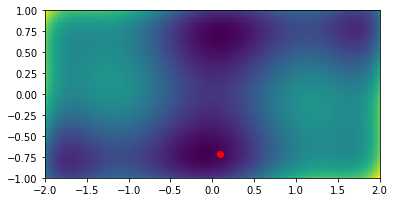

In [6]:
# plot function within the given domain
x_domain = np.linspace(-2,2,200)
y_domain = np.linspace(-1,1,100)
x_grid, y_grid = np.meshgrid(x_domain, y_domain)
plt.imshow(f([x_grid,y_grid]), extent=(-2,2,-1,1))

# minimize function
start_point = np.multiply(np.random.rand(2)-0.5, [4,2]) 
print('Starter point for minimization: ',start_point)
f_min = optimize.minimize(f, x0=start_point, method='SLSQP')
print('The found minimum is',f_min.fun,'in',f_min.x)
plt.plot(f_min.x[0], f_min.x[1], 'ro')
plt.show()

With most of the methods the result doesn't change: there are 2 global minima of the funcion inside the given domain:
* x = 0.09 and y = -0.71
* x = -0.09 and y = 0.71

In both cases, the value assumed by the function is  -1.03

If we choose (0,0) as starting point, the method won't work because that is a local maximun, the derivate of f is equal to zero and the "estimated minimun" won't change (indipendently from the number of iteration that the minimize algorithm is doing:

The found minimum is 0.0 in [0. 0.]


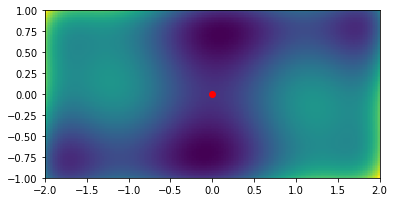

In [7]:
plt.imshow(f([x_grid,y_grid]), extent=(-2,2,-1,1))
f_min = optimize.minimize(f, x0=(0,0))
print('The found minimum is',f_min.fun,'in',f_min.x)
plt.plot(f_min.x[0], f_min.x[1], 'ro')
plt.show()

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

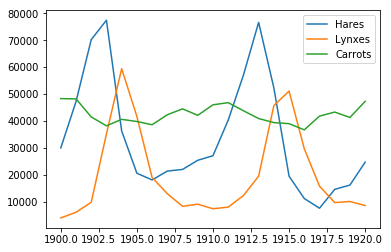

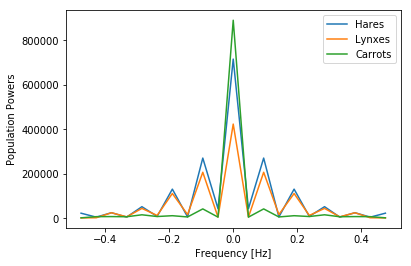

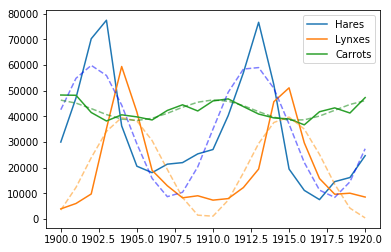

In [30]:
from scipy import fftpack

#IMPORT DATA FROM TXT FILE AND PLOT
data = np.loadtxt("populations.txt")

years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.legend()
plt.show()


# FFT ANALISYS

# The FFT of the populations
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)

# And the power (***_fft is of complex dtype)
power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)
power_carrots = np.abs(carrots_fft)

# The corresponding frequencies (same for all populations)
sample_freq = fftpack.fftfreq(hares.size)

# Plot the FFT power (shifting it and its frequency domain)
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(power_hares), label='Hares')
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(power_lynxes), label='Lynxes')
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(power_carrots), label='Carrots')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Population Powers')
plt.legend()
plt.show()

# Filtering the spectre (keeping only offset and 1st peak)ò
hares_fft[power_hares < 200000] = 0
lynxes_fft[power_lynxes < 150000] = 0
carrots_fft[power_carrots < 30000] = 0

# Inverse FFT of the populations
filt_hares = fftpack.ifft(hares_fft)
filt_lynxes = fftpack.ifft(lynxes_fft)
filt_carrots = fftpack.ifft(carrots_fft)

# Plot results
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.plot(years, filt_hares, c='b', linestyle='--', alpha=0.5)
plt.plot(years, filt_lynxes, c='darkorange', linestyle='--', alpha=0.5)
plt.plot(years, filt_carrots, c='g', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

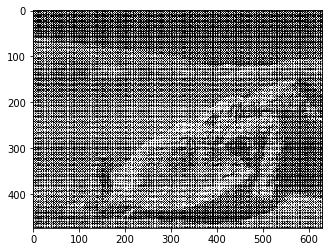

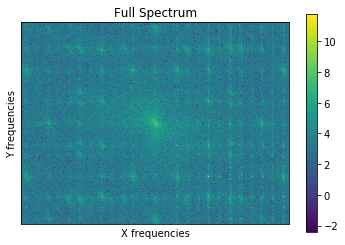

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


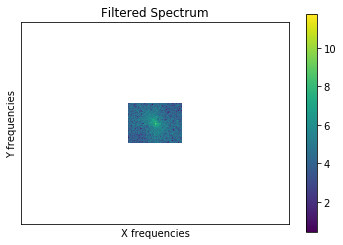

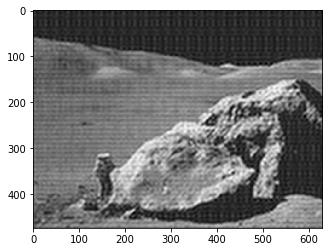

In [81]:
# Importing image
image = plt.imread('moonlanding.png')
plt.imshow(image, cmap='gray')
plt.show()

# FFT of the image
image_fft = fftpack.fft2(image)
image_fft = fftpack.fftshift(image_fft)

# Plotting full spectre of the image
plt.title('Full Spectrum')
plt.imshow(np.log(np.abs(image_fft)))
plt.xticks([])
plt.yticks([])
plt.xlabel('X frequencies')
plt.ylabel('Y frequencies')
plt.colorbar()
plt.show()
# To visualize the fft results I had to compute absolute values of 
# the elements of image_fft (I can't plot complex numbers) and I had
# to normalize the values to (0,1), since the colors are defined by that range

# Filter the spectre (set to 0 high freq components)
perc = 0.1  #has to be inside (0,0.5]
x_dim, y_dim = image_fft.shape

image_fft[int(x_dim/2+perc*x_dim): , :] = 0
image_fft[:int(x_dim/2-perc*x_dim), :] = 0
image_fft[: , int(y_dim/2+perc*y_dim):] = 0
image_fft[: , :int(y_dim/2-perc*y_dim)] = 0

plt.imshow(np.log(np.abs(image_fft)))
plt.title('Filtered Spectrum')
plt.xticks([])
plt.yticks([])
plt.xlabel('X frequencies')
plt.ylabel('Y frequencies')
plt.colorbar()
plt.show()

# Inverse FFT and plot of the filtered image
filt_image = fftpack.ifft2(fftpack.fftshift(image_fft))
plt.imshow(np.real(filt_image), cmap='gray')
plt.show()